In [0]:
from __future__  import print_function
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

import torch.optim as optim

In [36]:
#Downloading, Loading and Transforming our CIFAR10 datasets
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size = 4, shuffle = False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


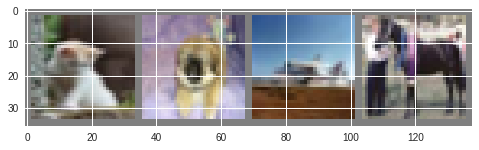

cat dog plane horse
torch.Size([4, 3, 32, 32])


In [37]:
def imshow(img):
  img = img/2 +0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()
  
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[i] for i in labels))
print(images.size())


In [0]:
#Feed-Forward

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
    
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

    

In [60]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [61]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [0]:
#Loss and Optimizers
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [63]:
#Going through the whole Data Epoch Number of times
for epoch in range(100):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    
    optimizer.zero_grad()
    
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    if i%2000 == 1999:
      print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0
    
    

[1,  2000] loss: 0.992
[1,  4000] loss: 1.012
[1,  6000] loss: 0.981
[1,  8000] loss: 1.022
[1, 10000] loss: 1.028
[1, 12000] loss: 1.030
[2,  2000] loss: 0.924
[2,  4000] loss: 0.940
[2,  6000] loss: 0.944
[2,  8000] loss: 0.975
[2, 10000] loss: 0.962
[2, 12000] loss: 0.996
[3,  2000] loss: 0.886
[3,  4000] loss: 0.914
[3,  6000] loss: 0.912
[3,  8000] loss: 0.926
[3, 10000] loss: 0.940
[3, 12000] loss: 0.940
[4,  2000] loss: 0.832
[4,  4000] loss: 0.847
[4,  6000] loss: 0.863
[4,  8000] loss: 0.884
[4, 10000] loss: 0.920
[4, 12000] loss: 0.919
[5,  2000] loss: 0.784
[5,  4000] loss: 0.828
[5,  6000] loss: 0.854
[5,  8000] loss: 0.852
[5, 10000] loss: 0.877
[5, 12000] loss: 0.886
[6,  2000] loss: 0.771
[6,  4000] loss: 0.793
[6,  6000] loss: 0.812
[6,  8000] loss: 0.836
[6, 10000] loss: 0.837
[6, 12000] loss: 0.854
[7,  2000] loss: 0.745
[7,  4000] loss: 0.773
[7,  6000] loss: 0.784
[7,  8000] loss: 0.803
[7, 10000] loss: 0.845
[7, 12000] loss: 0.831
[8,  2000] loss: 0.705
[8,  4000] 

KeyboardInterrupt: ignored

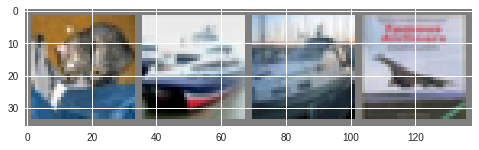

GroundTruth:    cat  ship  ship plane


In [65]:
#Predict Using the Test Images

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = net(images.to(device))


In [68]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car plane


In [72]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 58 %


In [73]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 67 %
Accuracy of   car : 75 %
Accuracy of  bird : 41 %
Accuracy of   cat : 41 %
Accuracy of  deer : 49 %
Accuracy of   dog : 51 %
Accuracy of  frog : 62 %
Accuracy of horse : 67 %
Accuracy of  ship : 63 %
Accuracy of truck : 62 %
